## Caso Practico - Prediccion de precio de casas

En este dataset cada fila expresa las propiedades de una casa y el precio de la misma. La idea es generar un modelo que nos prediga el precio de las casas en base a ciertas caracteristicas de la misma.

In [ ]:
# importamos las librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# vamos a crear una funcion para que entrene el modelo y nos devuelva el valor de RMSE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
# cargamos el dataframe

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
data_orig = data.copy()

#### Los Datos

Para simplificar el entendimiento voy a dejar un breve diccionario de que significa cada uno de los campos que vamos
a usar para el analisis:

* Diccionario_columnas

Si queremos un entendimiento mas profundo sobre cada una de las columnas dirigirse a la documentacion oficial:

[link a doc oficial](https://s3.amazonaws.com/dq-content/307/data_description.txt)

In [ ]:
data.info()

### Hagamos una exploracion muy rapida

In [ ]:
# veamos la cantidad de valores nulos que tenemos por columnas
pd.options.display.max_rows = 85


In [ ]:
# podemos establecer una definicion propia, decimos que si los datos tienen mas del 80% de valores nulos entonces no nos
# sirve



In [ ]:
# veamos si hay valores duplicados, nos basamos en la columna PID, que es Property ID
# y debe ser unico para cada casa, sino estaremos ante casas repetidas



## Organizacion del codigo

Trabajar con Jupyter notebook es muy dinamico pero a la vez muy desorganizado, por lo que vamos a dividir nuestro codigo en 
3 funciones para simplificar.


* Transformacion

* Seleccion

* Entrenamiento y testeo

In [ ]:
    
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    NO INCLUIMOS LA ELIMINACION DE COLUMNAS ENTERAS
    '''
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return 

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    

### Variables numericas

In [ ]:
# veamos cuales son las columnas numericas, vamos a basarnos en ellas para el modelado
pd.options.display.max_columns = 85


In [ ]:
# vemos que de entrada hay varias variables numericas que podemos usar para el modelo, pero tenemos que elegir cuales
# para hacer un mejor analisis

# podriamos pasar todo como viene? si podriamos, rellenando o eliminando los valores nulos, pero a continuacion vamos
# a tratar de ver que nos sirve y que no

In [ ]:
# veamos las correlaciones con el target para ver que variables o features describen de mejor manera el comportamiento
# de nuestro target

In [ ]:
# como regla general podemos tomar como umbral una correlacion superior a 0.3, es buena practica ir ajustando
# este numero y probando la performance del modelo



### Tratamiento de valores nulos

In [ ]:
# analicemos estas 3 variables para ver que hacer con los nulos
# veamos que porcentaje de nulos es 490



In [ ]:
# su correlacion con el target?



In [ ]:
# volvemos a chequear por las otras variables con valores nulos


In [ ]:
# vamos a dejar el analisis del Garage Yr Blt para mas adelante y nos vamos a entrar en las otras columnas con valores
# nulos



In [ ]:
# OJO ACA ENTONCES, VAMOS A HACER UNA TRANSFORMACION, Y NO SOBRE NUESTRO DF ORIGINAL
# TENEMOS QUE LLEVAR REGISTRO DE ESTAS COSAS PORQUE VAN A TENER QUE HACERSE SIEMPRE QUE QUERRAMOS ENTRENAR EL MODELO
# YA QUE AL SER REGRESION LINEAL NO PODEMOS CONTAR CON VALORES NULOS




In [ ]:
# para los otros casos vamos a tirar las filas que contengan nulo en estos campos



### Colinearidad

In [ ]:
#data_numerica[['Garage Yr Blt','Year Built','Year Remod/Add']]

# y aca vemos que estas variables nos dan informacion muy similar, lo que nos lleva a otro analisis. El de correlacion
# entre variables, para evitar COLINEARIDAD

In [ ]:
# vemos que hay  pares de variables que estan muy correlacionadas entre si, de ellas tenemos que elegir solo 1


In [ ]:
# hagamos uno con anotaciones de las variables mas correlacionadas para ver cual tiene mas correlacion con el target
#(es decir cual describe mejor al target)

lista = ['Year Built','Garage Yr Blt','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','TotRms AbvGrd'
        ,'Gr Liv Area','SalePrice']


In [ ]:
# volvamos a entrenar el modelo con estos cambios, para ello tenemos que modificar las funciones de transformacion y
# seleccion respectivamente

In [ ]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return 

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [ ]:

data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

### Varianza de las features


Ahora veamos lo de varianza

Cuando una feature tiene una varianza muy baja, quiere decir que su valor no cambia mucho entre filas, lo cual indica
que esta columna va a tener siempre el mismo valor y eso no va a tener poder predictivo y debemos eliminarla 

Para comparar las varianzas entre las distintas columnas necesitamos reescalar los datos para que sus valores varien entre
0 y 1, de esta manera podemos hacer la comparacion.

Para ello usamos la formula conocida como min-max scaling

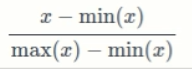

* x es un valor individual
* min(x) es el valor minimo de la columna a la cual pertenece x
* max(x) es el valor maximo de la columna a la cual pertenece x

In [ ]:
# vamos a hacer esto para cada una de las columnas que nos queda en nuestro dataframe


In [ ]:
# ahora vamos a calcular la varianza y veamos que tenemos



In [ ]:
# en este caso no vamos a remover ninguna, pero es cuestion de ir probando que funciona mejor

### Variables numericas que requieren modificacion



In [ ]:
# que pasa con las variables de los anios, por si solas son numeros que no indican mucho, que pasa si podemos hacer
# que estos numeros sean mas significativos

# lo que pasa es que estos valores no son realmente representativos de la antiguedad de una casa, por ejemplo, si una casa
# se construyo en 1960 y se vende en 1980, y otra se vende en el 2000 , la segunda es el doble de antigua, y esto no se
# ve reflejado en estos numeros.

# entonces en vez de los años en los que los eventos sucedieron, nosotros queremos la diferencia entre esos años

# por ejemplo la antiguedad de la casa en años al momento de venderla

In [ ]:
# modificamos las funciones para estos cambios

In [ ]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)

    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[['Overall Qual','Mas Vnr Area','Years Since Remod','Years Before Sale','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']]

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

### Variables innecesarias y leakage

Hay que eliminar las variables que:
- no sirven para el algoritmo, porque no tienen que ver con el problema
- variables leakage, que son aquellas que filtran datos sobre la venta (son spoilers)

 Las **variables leakage** son variables que no vamos a tener a la hora de hacer la prediccion, por lo que no tenemos que tenerlas en cuenta
a la hora de entrenar el modelo, por mas interesantes que sean !!!

In [ ]:
# variables leakage
# son variables que no vamos a tener a la hora de hacer la prediccion, por lo que no tenemos que tenerlas en cuenta
# a la hora de entrenar el modelo, por mas interesantes que sean !!!

### Outliers

El manejo de outliers es importante debido a que dichos valores afectan la precision de nuestro modelo, hay distintas formas de tratarlos y dependen mucho del problema a abordar (pueden ser ouliers por error de tipografia o por datos reales pero atipicos)

In [ ]:
# solo para ejemplificar vamos a tomar como ourlier a los valores que se encuentren por encima del percentil 98 y
# los vamos a reemplazar por el valor en el percentil 98

In [ ]:
# supongamos que seguimos haciendo este analisis y
# decidimos hacer esta transformacion sobre las features BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Open Porch SF',

In [ ]:
# veamos si esto implica sonbre la performance del modelo

In [ ]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Since Remod'] = years_since_remod
    
    df = df.drop([1702, 2180, 2181], axis=0)
    
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    return df[['Overall Qual','Mas Vnr Area','Years Since Remod','Years Before Sale','BsmtFin SF 1','Total Bsmt SF',
               'Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars','Wood Deck SF','Open Porch SF','SalePrice']]

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [ ]:

data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

### Variables categoricas

    Tenemos que incluirlas en el modelo, puede que traiga buenos resultados, pero cuales incluimos? Que criterio tomamos?

In [ ]:
# primero veamos cuales son las variables categoricas que tenemos 


In [ ]:
## Veamos que variables categoricas todavia permancen en nuestro dataframe


In [ ]:
# ahora tenemos que pasar esto a la funcion

In [ ]:
def transformacion(df):
    '''
    Operaciones que afecten los valores del df, como relleno de nulos, eliminar filas, mapeos, reemplazo de valores, etc
    '''
    mediana = df.loc[:,'Mas Vnr Area'].median()
    df.loc[:,'Mas Vnr Area'] =  df.loc[:,'Mas Vnr Area'].fillna(mediana)
    
    df.dropna(axis=0,subset=['Garage Area','Garage Cars','BsmtFin SF 1','Total Bsmt SF'],inplace=True)
    
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Since Remod'] = years_since_remod
    
    df = df.drop([1702, 2180, 2181], axis=0)
    
    features = ['BsmtFin SF 1', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Open Porch SF']
    for col in features:
        limite = df[col].quantile(0.98)
        mask = df[col]>limite
        df.loc[mask,col] = limite
    
    return df

def seleccion(df):
    '''
    Seleccion de aquellas features o columnas que se van a utilizar para el entrenamiento del modelo
    '''
    
    return df

def entrenar_testear(df):
    '''
    Instanciar el modelo, entrenarlo y luego evaluarlo
    '''
    lr = LinearRegression()
    
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1), df['SalePrice'],
                                                        test_size=0.30, random_state=38)
    lr.fit(X_train,y_train)
    
    train_predictions = lr.predict(X_train)
    test_predictions = lr.predict(X_test)
    
    train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, y_train))
    test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, y_test))
    
    print(f"El error de train es {train_rmse_2}")
    print(f"El error de test es {test_rmse_2}")

In [ ]:
data_transformada = transformacion(data_orig)
data_filtrada = seleccion(data_transformada)
entrenar_testear(data_filtrada)

## Y SE PUEDE SEGUIR !!!